In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

In [2]:
class Kuramoto_model:
    def __init__(self, N, K_time, K_curve,time, time_step):
        self.N = N
        self.K_time = K_time
        self.K_curve = K_curve
        self.time = time
        self.time_step = time_step
        self.time_span = np.arange(*(0,self.time), self.time_step)
        
        np.random.seed(35)
        
        self.omega = np.random.normal(0,1,self.N)
        self.theta = 2 * np.pi * np.random.rand(self.N)
    
    def oscillator_eqn(self,t, theta, K):
        dtheta_dt = np.zeros(self.N)
        for i in range(self.N):
            theta_i = theta[i]
            w = self.omega[i]
            
            dtheta_dt[i] = w + (K/self.N) * np.sum(np.sin(theta - theta_i))   
        return dtheta_dt
    
    def order_param(self, theta):
        total_sum = sum([(np.exp(1j * i)) for i in theta])
        return abs(total_sum / self.N)
    
    def solve_r_time(self):
        t_span = (0,self.time)
        r_time_vals = {K: [] for K in self.K_time}
        
        for K in self.K_time:
         solve = solve_ivp(lambda t,y: self.oscillator_eqn(t,y, K), t_span=t_span, y0=self.theta, t_eval=self.time_span, method='LSODA')
         r_time_vals[K] = [self.order_param(theta) for theta in solve.y.T]
         
        return r_time_vals
    
    def solve_r_curve(self):
        t_span = (0,self.time)
        r_curve_vals = []
        
        for K in self.K_curve:
         solve = solve_ivp(lambda t,y: self.oscillator_eqn(t,y, K), t_span=t_span, y0=self.theta, t_eval=self.time_span, method='LSODA')
         r_k = [self.order_param(theta) for theta in solve.y.T]
         
         r_curve_vals.append(np.mean(r_k))
        return r_curve_vals                 

In [3]:
# Setting up the parameters
K_time = [0.0, 0.5, 1.2, 2.5, 3.2, 4.7, 5.5]
K_curve = np.linspace(0,6,30)
time = 10
time_step = 0.1
N = 100

# Model Initialize
model = Kuramoto_model(N=N, K_time=K_time, K_curve=K_curve, time=time, time_step=time_step)

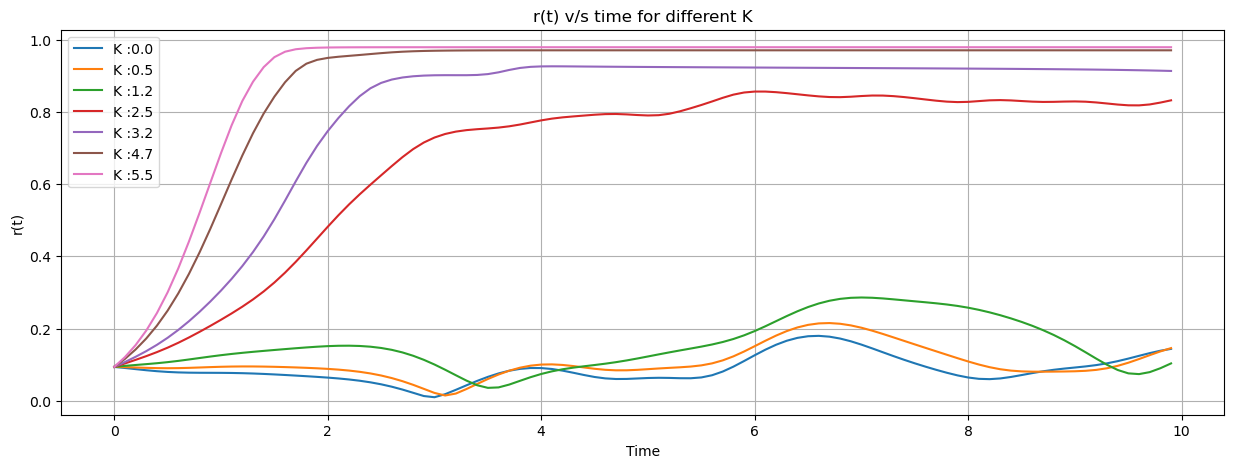

In [4]:
r_time = model.solve_r_time()

plt.figure(figsize=(15,5))
for K in K_time:
    plt.plot(model.time_span,r_time[K], label=f'K :{K}')
    plt.grid()
    plt.legend()

plt.xlabel("Time")
plt.ylabel("r(t)")
plt.title("r(t) v/s time for different K")
plt.show()    
    

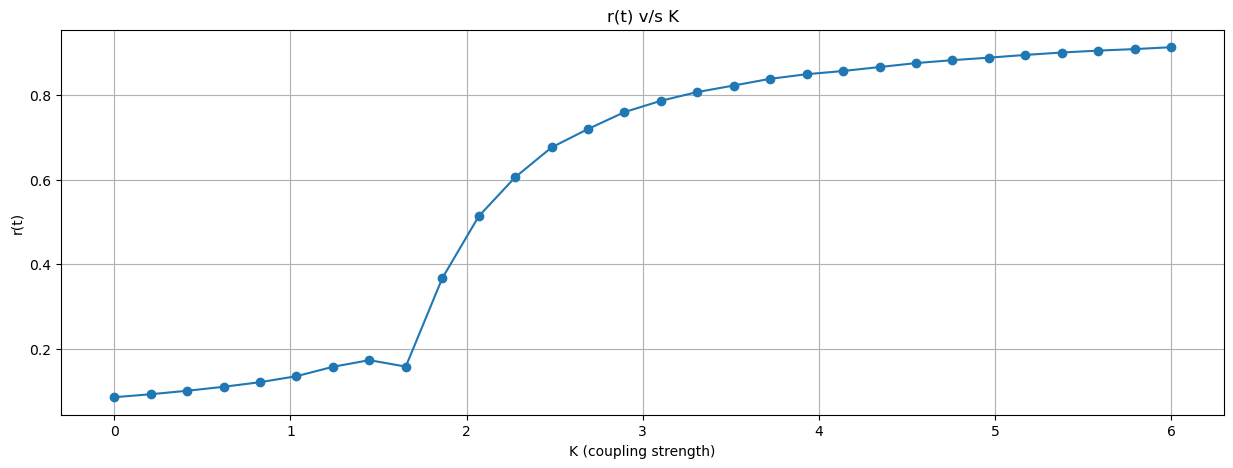

In [5]:
r_curve = model.solve_r_curve()
plt.figure(figsize=(15,5))

plt.plot(K_curve, r_curve, marker="o")
plt.xlabel("K (coupling strength)")
plt.ylabel("r(t)")
plt.title("r(t) v/s K")
plt.grid()
plt.show()

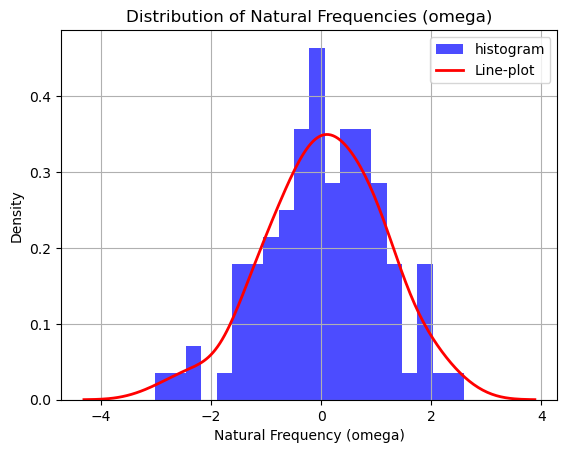

In [6]:
plt.hist(model.omega, bins=20, density=True, alpha=0.7, color='blue', label="histogram")
sns.kdeplot(model.omega, color='red', label='Line-plot', linewidth=2)
plt.xlabel('Natural Frequency (omega)')
plt.ylabel('Density')
plt.title('Distribution of Natural Frequencies (omega)')
plt.legend(loc="upper right")
plt.grid()
plt.show()